In [2]:
import pandas as pd

In [3]:
financial_data=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_financial_data.csv")
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Division                     40 non-null     object 
 1   Quarter                      40 non-null     object 
 2   Year                         40 non-null     int64  
 3   Revenue_M                    40 non-null     float64
 4   Operating_Costs_M            40 non-null     float64
 5   Net_Profit_M                 40 non-null     float64
 6   Employee_Count               40 non-null     int64  
 7   RD_Investment_M              40 non-null     float64
 8   Market_Share_Pct             32 non-null     float64
 9   Customer_Satisfaction_Score  40 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.3+ KB


In [33]:
financial_data.head()

,Division,Quarter,Year,Revenue_M,Operating_Costs_M,Net_Profit_M,Employee_Count,RD_Investment_M,Market_Share_Pct,Customer_Satisfaction_Score,GVA
4,Wayne Aerospace,Q1,2024,1580.2,1125.8,454.4,9100,158.0,20.8,4.4,454.4
5,Wayne Aerospace,Q2,2024,1720.5,1215.3,505.2,9350,172.0,22.1,4.6,505.2
6,Wayne Aerospace,Q3,2024,1850.3,1285.4,564.9,9600,185.0,23.5,4.7,564.9
7,Wayne Aerospace,Q4,2024,1950.7,1320.2,630.5,9800,195.0,24.2,4.8,630.5
12,Wayne Biotech,Q1,2024,1180.3,845.7,334.6,6800,118.0,17.8,4.3,334.6


In [4]:
financial_data['Year'].unique()

array([2023, 2024], dtype=int64)

In [5]:
trend = (
    financial_data.groupby(["Year", "Quarter"])[["Revenue_M", "Net_Profit_M"]]
    .sum()
    .reset_index()
    .sort_values(by=["Year", "Quarter"])
)
trend



,Year,Quarter,Revenue_M,Net_Profit_M
0,2023,Q1,5262.5,1170.0
1,2023,Q2,5793.2,1347.9
2,2023,Q3,6223.2,1466.5
3,2023,Q4,6943.1,1727.9
4,2024,Q1,6556.8,1594.2
5,2024,Q2,7323.1,1820.9
6,2024,Q3,7982.7,2044.2
7,2024,Q4,8597.8,2286.9


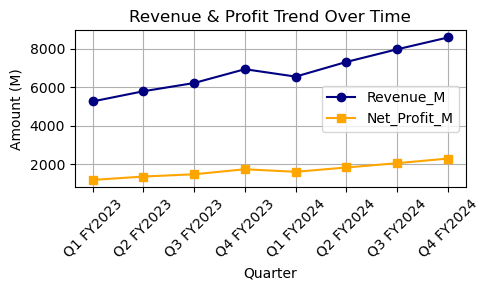

In [6]:
import matplotlib.pyplot as plt

trend["Period"] = trend["Quarter"] + " FY" + trend["Year"].astype(str)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

plt.plot(trend["Period"], trend["Revenue_M"], marker='o', label="Revenue_M", color='navy')
plt.plot(trend["Period"], trend["Net_Profit_M"], marker='s', label="Net_Profit_M", color='orange')

plt.title("Revenue & Profit Trend Over Time")
plt.xlabel("Quarter")
plt.ylabel("Amount (M)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
financial_data["GVA"] = financial_data["Revenue_M"] - financial_data["Operating_Costs_M"]

In [8]:
trend_gdp = (
    financial_data.groupby(["Year", "Quarter"])[["Revenue_M", "GVA"]]
    .sum()
    .reset_index()
    .sort_values(by=["Year", "Quarter"])
)
trend_gdp



,Year,Quarter,Revenue_M,GVA
0,2023,Q1,5262.5,1200.6
1,2023,Q2,5793.2,1382.5
2,2023,Q3,6223.2,1515.5
3,2023,Q4,6943.1,1832.7
4,2024,Q1,6556.8,1684.4
5,2024,Q2,7323.1,1950.5
6,2024,Q3,7982.7,2195.0
7,2024,Q4,8597.8,2465.7


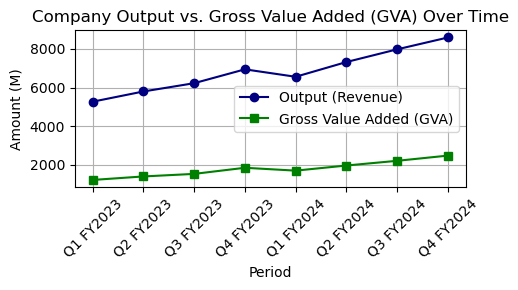

In [9]:
import matplotlib.pyplot as plt
trend_gdp["Period"] = trend_gdp["Quarter"] + " FY" + trend_gdp["Year"].astype(str)


plt.figure(figsize=(5, 3))

plt.plot(trend_gdp["Period"], trend_gdp["Revenue_M"],
         marker='o', label="Output (Revenue)", color='navy')

plt.plot(trend_gdp["Period"], trend_gdp["GVA"],
         marker='s', label="Gross Value Added (GVA)", color='green')

plt.title("Company Output vs. Gross Value Added (GVA) Over Time")
plt.xlabel("Period")
plt.ylabel("Amount (M)")

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:


quarterly = (
    financial_data.groupby(["Year", "Quarter"])[["Revenue_M", "GVA"]]
    .sum()
    .reset_index()
    .sort_values(["Year", "Quarter"])
)

quarterly



,Year,Quarter,Revenue_M,GVA
0,2023,Q1,5262.5,1200.6
1,2023,Q2,5793.2,1382.5
2,2023,Q3,6223.2,1515.5
3,2023,Q4,6943.1,1832.7
4,2024,Q1,6556.8,1684.4
5,2024,Q2,7323.1,1950.5
6,2024,Q3,7982.7,2195.0
7,2024,Q4,8597.8,2465.7


In [11]:

quarterly["GDP_YoY_%"] = (
    quarterly.groupby("Quarter")["Revenue_M"].pct_change() * 100
)
quarterly["GVA_YoY_%"] = (
    quarterly.groupby("Quarter")["GVA"].pct_change() * 100
)

quarterly


,Year,Quarter,Revenue_M,GVA,GDP_YoY_%,GVA_YoY_%
0,2023,Q1,5262.5,1200.6,NaN,NaN
1,2023,Q2,5793.2,1382.5,NaN,NaN
2,2023,Q3,6223.2,1515.5,NaN,NaN
3,2023,Q4,6943.1,1832.7,NaN,NaN
4,2024,Q1,6556.8,1684.4,24.594774,40.296518
5,2024,Q2,7323.1,1950.5,26.408548,41.084991
6,2024,Q3,7982.7,2195.0,28.273236,44.836688
7,2024,Q4,8597.8,2465.7,23.832294,34.539204


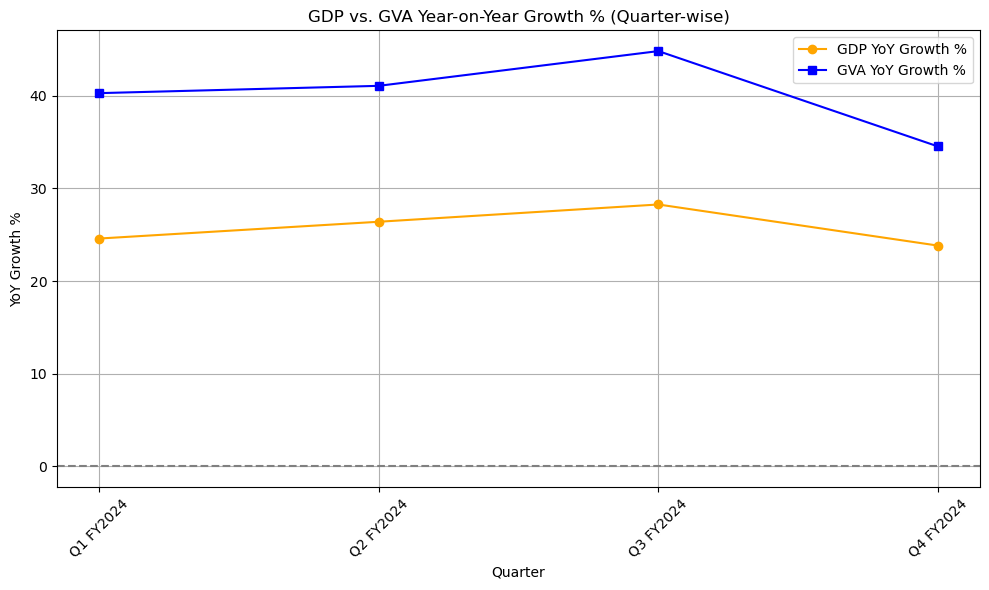

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(
    quarterly["Quarter"] + " FY" + quarterly["Year"].astype(str),
    quarterly["GDP_YoY_%"],
    label="GDP YoY Growth %", color="orange", marker='o'
)
plt.plot(
    quarterly["Quarter"] + " FY" + quarterly["Year"].astype(str),
    quarterly["GVA_YoY_%"],
    label="GVA YoY Growth %", color="blue", marker='s'
)

plt.title("GDP vs. GVA Year-on-Year Growth % (Quarter-wise)")
plt.xlabel("Quarter")
plt.ylabel("YoY Growth %")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [13]:
financial_data.head()


,Division,Quarter,Year,Revenue_M,Operating_Costs_M,Net_Profit_M,Employee_Count,RD_Investment_M,Market_Share_Pct,Customer_Satisfaction_Score,GVA
0,Wayne Aerospace,Q1,2023,1250.5,945.2,305.3,8500,125.0,18.5,4.2,305.3
1,Wayne Aerospace,Q2,2023,1380.7,1020.8,359.9,8750,140.5,19.2,4.3,359.9
2,Wayne Aerospace,Q3,2023,1420.3,1055.1,365.2,9000,145.8,19.8,4.4,365.2
3,Wayne Aerospace,Q4,2023,1650.9,1180.6,470.3,9200,165.0,21.2,4.5,470.3
4,Wayne Aerospace,Q1,2024,1580.2,1125.8,454.4,9100,158.0,20.8,4.4,454.4


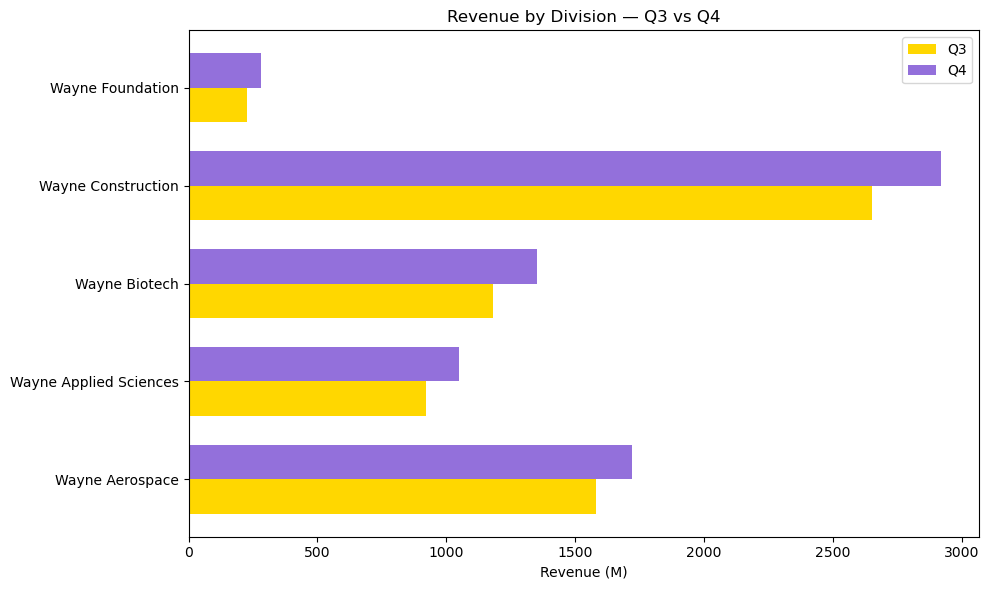

In [14]:

financial_data = financial_data[financial_data["Year"] == 2024]


division_quarter = (
    financial_data.groupby(["Division", "Quarter"])["Revenue_M"]
    .sum()
    .reset_index()
)

division_quarter
pivot = division_quarter.pivot(
    index="Division", columns="Quarter", values="Revenue_M"
).fillna(0)

import numpy as np

divisions = pivot.index.tolist()
quarters = pivot.columns.tolist()


y = np.arange(len(divisions))
bar_height = 0.35

plt.figure(figsize=(10, 6))


plt.barh(y - bar_height/2, pivot[quarters[0]], height=bar_height, label=f"{quarters[2]}", color="gold")


plt.barh(y + bar_height/2, pivot[quarters[1]], height=bar_height, label=f"{quarters[3]}", color="mediumpurple")

plt.yticks(y, divisions)
plt.xlabel("Revenue (M)")
plt.title("Revenue by Division — Q3 vs Q4")
plt.legend()
plt.tight_layout()
plt.show()

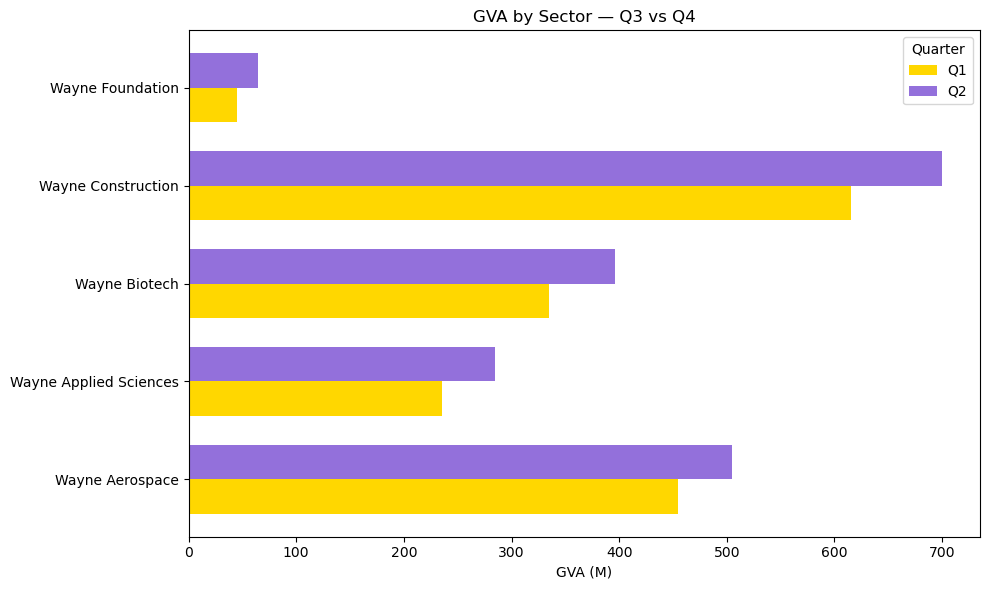

In [15]:


data = financial_data[financial_data["Year"] == 2024]


sector_quarter = (
    data.groupby(["Division", "Quarter"])["GVA"]
    .sum()
    .reset_index()
)


pivot = sector_quarter.pivot(
    index="Division", columns="Quarter", values="GVA"
).fillna(0)


sectors = pivot.index.tolist()
quarters = pivot.columns.tolist()


y = np.arange(len(sectors))
bar_height = 0.35

plt.figure(figsize=(10, 6))


plt.barh(y - bar_height/2, pivot[quarters[0]], height=bar_height, label=f"{quarters[0]}", color="gold")

plt.barh(y + bar_height/2, pivot[quarters[1]], height=bar_height, label=f"{quarters[1]}", color="mediumpurple")

plt.yticks(y, sectors)
plt.xlabel("GVA (M)")
plt.title("GVA by Sector — Q3 vs Q4")
plt.legend(title="Quarter")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
hr_df=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_hr_analytics.csv")


hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Department                   216 non-null    object 
 1   Employee_Level               216 non-null    object 
 2   Date                         216 non-null    object 
 3   Retention_Rate_Pct           216 non-null    float64
 4   Training_Hours_Annual        216 non-null    int64  
 5   Performance_Rating           216 non-null    float64
 6   Salary_Band                  216 non-null    object 
 7   Benefits_Utilization_Pct     216 non-null    float64
 8   Security_Clearance_Level     216 non-null    object 
 9   Internal_Promotions          216 non-null    int64  
 10  Diversity_Index              216 non-null    float64
 11  Employee_Satisfaction_Score  216 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 20.4+ KB


In [17]:

dept_counts = hr_df["Department"].value_counts().reset_index()
dept_counts.columns = ["Department", "Count"]

dept_counts


,Department,Count
0,Wayne Aerospace,72
1,Wayne Biotech,72
2,Wayne Applied Sciences,72


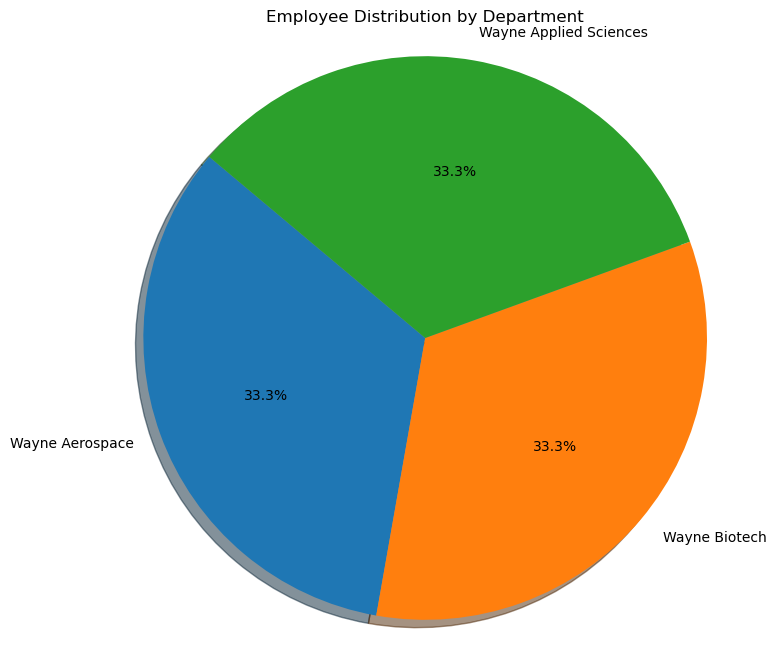

In [18]:
import matplotlib.pyplot as plt

# Pie chart setup
plt.figure(figsize=(8, 8))
plt.pie(
    dept_counts["Count"],
    labels=dept_counts["Department"],
    autopct="%1.1f%%",
    startangle=140,
    shadow=True
)

plt.title("Employee Distribution by Department")
plt.axis("equal")  
plt.show()


In [19]:
hr_df.describe()

,Retention_Rate_Pct,Training_Hours_Annual,Performance_Rating,Benefits_Utilization_Pct,Internal_Promotions,Diversity_Index,Employee_Satisfaction_Score
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,94.901389,136.078704,4.991667,90.544444,13.083333,0.720833,8.686111
std,5.245317,33.687460,0.594334,5.758421,8.137339,0.086992,0.731225
min,78.900000,72.000000,3.600000,76.200000,1.000000,0.510000,6.800000
25%,91.875000,106.000000,4.500000,86.375000,7.000000,0.660000,8.200000
50%,96.650000,136.000000,5.000000,90.800000,12.000000,0.720000,8.700000
75%,99.625000,166.000000,5.425000,94.950000,18.000000,0.782500,9.200000
max,100.000000,202.000000,6.300000,100.000000,46.000000,0.910000,10.000000


In [51]:
hr_df.head()

,Department,Employee_Level,Date,Retention_Rate_Pct,Training_Hours_Annual,Performance_Rating,Salary_Band,Benefits_Utilization_Pct,Security_Clearance_Level,Internal_Promotions,Diversity_Index,Employee_Satisfaction_Score,Satisfaction_Level
0,Wayne Aerospace,Entry Level,2023-01,82.3,156,3.8,45000-65000,78.5,Level 1,12,0.72,7.2,High
1,Wayne Aerospace,Mid Level,2023-01,89.7,142,4.1,65000-95000,82.1,Level 2,8,0.68,7.8,High
2,Wayne Aerospace,Senior Level,2023-01,94.2,98,4.3,95000-140000,87.3,Level 3,5,0.61,8.1,High
3,Wayne Aerospace,Executive,2023-01,96.8,76,4.5,140000+,91.2,Level 4,2,0.54,8.4,High
4,Wayne Aerospace,Entry Level,2023-02,83.1,158,3.9,45000-65000,79.2,Level 1,14,0.73,7.3,High


In [42]:
rd_data=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_rd_portfolio.csv")


rd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project_ID                   75 non-null     object 
 1   Project_Name                 75 non-null     object 
 2   Division                     75 non-null     object 
 3   Start_Date                   75 non-null     object 
 4   Status                       75 non-null     object 
 5   Budget_Allocated_M           75 non-null     float64
 6   Budget_Spent_M               75 non-null     float64
 7   Research_Category            75 non-null     object 
 8   Patent_Applications          75 non-null     int64  
 9   Commercialization_Potential  75 non-null     object 
 10  Timeline_Adherence_Pct       75 non-null     float64
 11  Lead_Scientist               75 non-null     object 
 12  Security_Classification      75 non-null     object 
dtypes: float64(3), int64(1

In [43]:
rd_data.head()

,Project_ID,Project_Name,Division,Start_Date,Status,Budget_Allocated_M,Budget_Spent_M,Research_Category,Patent_Applications,Commercialization_Potential,Timeline_Adherence_Pct,Lead_Scientist,Security_Classification
0,WA-2301,Stealth Aircraft Propulsion,Wayne Aerospace,2023-01-15,Active,85.5,45.2,Propulsion Systems,3,High,78.5,Dr. Sarah Chen,Level 3
1,WA-2302,Satellite Defense Grid,Wayne Aerospace,2023-02-20,Active,120.3,68.9,Defense Technology,5,Very High,82.1,Dr. Marcus Webb,Level 4
2,WA-2303,Advanced Radar Systems,Wayne Aerospace,2023-03-10,Completed,45.8,41.2,Sensor Technology,2,Medium,89.9,Dr. Elena Rodriguez,Level 2
3,WA-2304,Hypersonic Flight Control,Wayne Aerospace,2023-04-05,Active,95.7,52.3,Flight Systems,4,High,75.4,Dr. James Liu,Level 3
4,WA-2305,Quantum Navigation,Wayne Aerospace,2023-05-12,Active,78.9,38.7,Navigation,1,Very High,68.2,Dr. Raj Patel,Level 4


In [21]:
hr_df.columns

Index(['Department', 'Employee_Level', 'Date', 'Retention_Rate_Pct',
       'Training_Hours_Annual', 'Performance_Rating', 'Salary_Band',
       'Benefits_Utilization_Pct', 'Security_Clearance_Level',
       'Internal_Promotions', 'Diversity_Index',
       'Employee_Satisfaction_Score'],
      dtype='object')

In [22]:
hr_df.head()

,Department,Employee_Level,Date,Retention_Rate_Pct,Training_Hours_Annual,Performance_Rating,Salary_Band,Benefits_Utilization_Pct,Security_Clearance_Level,Internal_Promotions,Diversity_Index,Employee_Satisfaction_Score
0,Wayne Aerospace,Entry Level,2023-01,82.3,156,3.8,45000-65000,78.5,Level 1,12,0.72,7.2
1,Wayne Aerospace,Mid Level,2023-01,89.7,142,4.1,65000-95000,82.1,Level 2,8,0.68,7.8
2,Wayne Aerospace,Senior Level,2023-01,94.2,98,4.3,95000-140000,87.3,Level 3,5,0.61,8.1
3,Wayne Aerospace,Executive,2023-01,96.8,76,4.5,140000+,91.2,Level 4,2,0.54,8.4
4,Wayne Aerospace,Entry Level,2023-02,83.1,158,3.9,45000-65000,79.2,Level 1,14,0.73,7.3


In [23]:
security_df=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_security_data.csv")

security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                108 non-null    object 
 1   District                            108 non-null    object 
 2   Security_Incidents                  108 non-null    int64  
 3   Response_Time_Minutes               108 non-null    float64
 4   Wayne_Tech_Deployments              108 non-null    int64  
 5   Public_Safety_Score                 108 non-null    float64
 6   Infrastructure_Investments_M        108 non-null    float64
 7   Crime_Prevention_Effectiveness_Pct  108 non-null    float64
 8   Community_Engagement_Events         108 non-null    int64  
 9   Employee_Safety_Index               108 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.6+ KB


In [24]:
security_df.tail()

,Date,District,Security_Incidents,Response_Time_Minutes,Wayne_Tech_Deployments,Public_Safety_Score,Infrastructure_Investments_M,Crime_Prevention_Effectiveness_Pct,Community_Engagement_Events,Employee_Safety_Index
103,2024-06-15,East End,43,2.5,127,8.5,12.3,82.0,16,9.6
104,2024-06-15,Park Row,1,0.9,190,10.0,19.0,97.5,23,10.0
105,2024-06-15,The Narrows,60,3.8,104,7.4,9.3,69.8,14,9.1
106,2024-06-15,Bristol,0,1.0,213,10.0,22.5,100.0,26,10.0
107,2024-06-15,Diamond District,7,1.3,170,10.0,18.3,94.2,21,9.9


In [25]:
security_df['District'].unique()

array(['Downtown', 'East End', 'Park Row', 'The Narrows', 'Bristol',
       'Diamond District'], dtype=object)

In [26]:
security_df['Date'] = pd.to_datetime(security_df['Date'])
districts = security_df['District'].unique()

In [27]:
security_df.isna().sum()

Date                                  0
District                              0
Security_Incidents                    0
Response_Time_Minutes                 0
Wayne_Tech_Deployments                0
Public_Safety_Score                   0
Infrastructure_Investments_M          0
Crime_Prevention_Effectiveness_Pct    0
Community_Engagement_Events           0
Employee_Safety_Index                 0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_10500\1223262723.py:101: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layout()
d:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


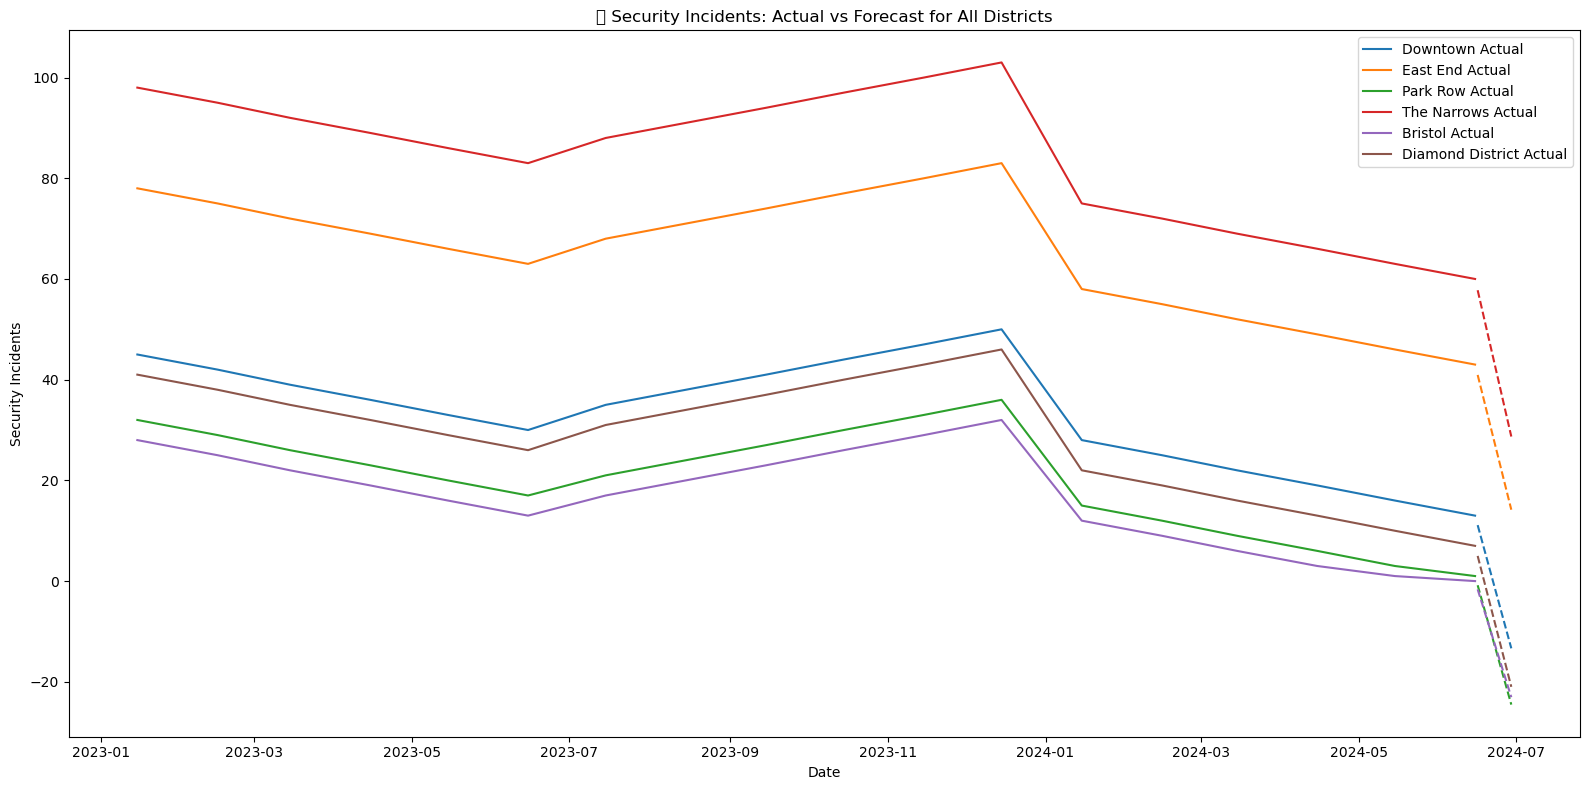

           District        MAE       RMSE          MAPE
0          Downtown  23.885196  25.888162  1.298181e+02
1          East End  26.456621  28.615067  5.357810e+01
2          Park Row  33.285714  37.127194  1.201429e+03
3       The Narrows  29.028051  31.350854  4.357912e+01
4           Bristol  32.000000  35.641068  7.142857e+10
5  Diamond District  25.599482  27.704986  2.173280e+02


In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import os
import pickle
forecast_period = 14
test_period = 7
metrics = []
results = {}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_map = {}


for idx, district_name in enumerate(districts):
    district_df = security_df[security_df['District'] == district_name]
    daily_incidents = (
        district_df.groupby('Date')['Security_Incidents']
        .sum().reset_index()
        .rename(columns={'Date': 'ds', 'Security_Incidents': 'y'})
        .sort_values('ds')
    )
    daily_incidents['ds'] = pd.to_datetime(daily_incidents['ds'])
    
    
    train = daily_incidents[:-test_period]
    test = daily_incidents[-test_period:]
    
    
    model = ExponentialSmoothing(
        train['y'],
        trend='add',
        seasonal=None,
        initialization_method='estimated'
    )
    fit = model.fit()
    
    
    y_pred = fit.forecast(test_period)
    mae = mean_absolute_error(test['y'], y_pred)
    mse = np.mean((test['y'] - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test['y'] - y_pred) / np.maximum(test['y'], 1e-8))) * 100
    
    
    metrics.append({
        'District': district_name,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    })
    
   
    full_fit = ExponentialSmoothing(
        daily_incidents['y'],
        trend='add',
        seasonal=None,
        initialization_method='estimated'
    ).fit()
    
    os.makedirs('models', exist_ok=True)


    model_filename = f"models/{district_name}_holtwinters.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(full_fit, f)
        
    last_date = daily_incidents['ds'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period)
    y_forecast = full_fit.forecast(forecast_period)
    
    combined_dates = pd.concat([daily_incidents['ds'], pd.Series(future_dates)])
    combined_values = pd.concat([daily_incidents['y'], pd.Series(y_forecast)])
    combined_type = ['Actual'] * len(daily_incidents) + ['Forecast'] * forecast_period
    
    results[district_name] = pd.DataFrame({
        'Date': combined_dates.values,
        'Value': combined_values.values,
        'Type': combined_type
    })
    
  
    color = color_cycle[idx % len(color_cycle)]
    color_map[district_name] = color




plt.figure(figsize=(16, 8))
for district_name, df_result in results.items():
    actuals = df_result[df_result['Type'] == 'Actual']
    forecasts = df_result[df_result['Type'] == 'Forecast']
    
    color = color_map[district_name]
    plt.plot(actuals['Date'], actuals['Value'], label=f"{district_name} Actual", color=color, linestyle='-')
    plt.plot(forecasts['Date'], forecasts['Value'], color=color, linestyle='--')

plt.title("🔐 Security Incidents: Actual vs Forecast for All Districts")
plt.xlabel("Date")
plt.ylabel("Security Incidents")
plt.legend()
plt.tight_layout()
plt.show()


metrics_df = pd.DataFrame(metrics)
print(metrics_df)


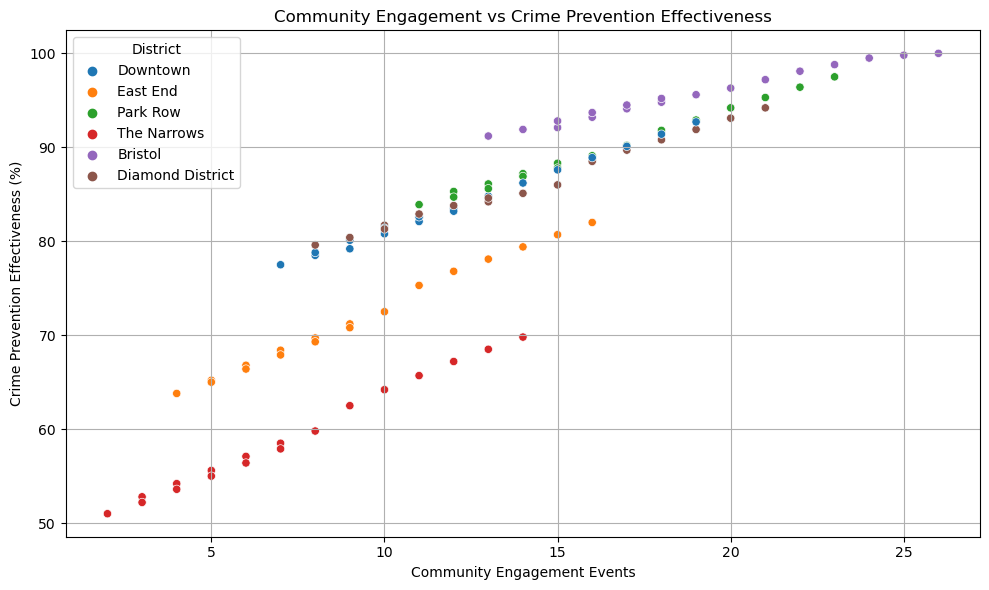

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=security_df,  # replace with your actual DataFrame variable
    x='Community_Engagement_Events',
    y='Crime_Prevention_Effectiveness_Pct',
    hue='District'
)

plt.title("Community Engagement vs Crime Prevention Effectiveness")
plt.xlabel("Community Engagement Events")
plt.ylabel("Crime Prevention Effectiveness (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
supply_df=pd.read_csv("D:/EDrivebackup/brocamp/techTest/DataAnalysisApp/backend/data/wayne_supply_chain.csv")
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Facility_Location          90 non-null     object 
 1   Product_Line               90 non-null     object 
 2   Date                       90 non-null     object 
 3   Monthly_Production_Volume  90 non-null     int64  
 4   Supply_Chain_Disruptions   90 non-null     int64  
 5   Cost_Per_Unit              90 non-null     float64
 6   Quality_Score_Pct          90 non-null     float64
 7   Sustainability_Rating      90 non-null     object 
 8   Vendor_Count               90 non-null     int64  
 9   Lead_Time_Days             90 non-null     int64  
 10  Inventory_Turnover         90 non-null     float64
 11  Carbon_Footprint_MT        90 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.6+ KB


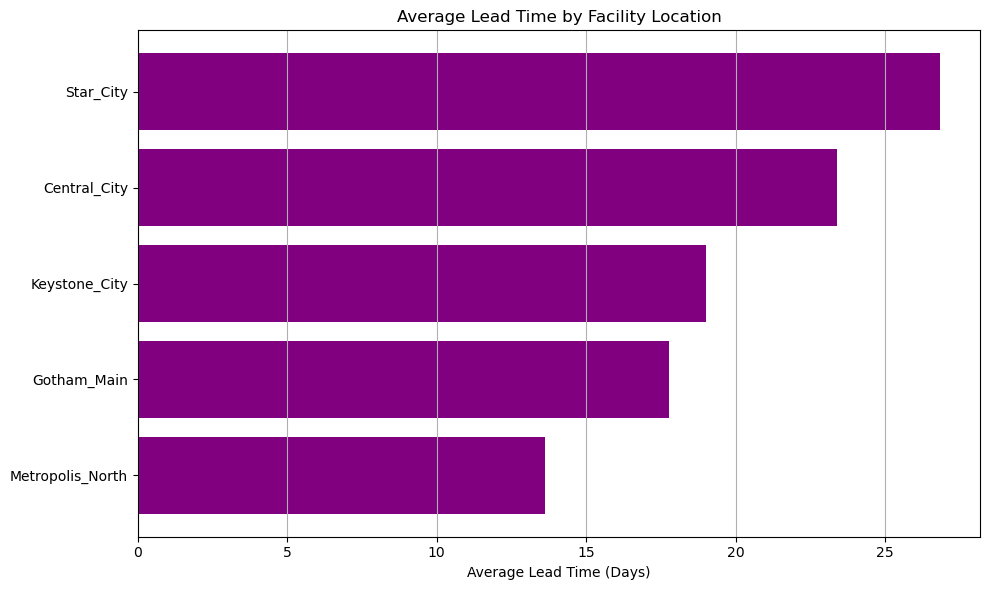

In [30]:
# Group by Facility_Location
lead_time_avg = (
    supply_df.groupby("Facility_Location")["Lead_Time_Days"]
    .mean()
    .reset_index()
    .sort_values(by="Lead_Time_Days", ascending=True)
)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    lead_time_avg["Facility_Location"],
    lead_time_avg["Lead_Time_Days"],
    color="purple"
)

plt.xlabel("Average Lead Time (Days)")
plt.title("Average Lead Time by Facility Location")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

# Sample logic to convert Quarter + Year into a datetime object
quarter_to_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}

financial_data['Quarter_Start_Month'] = financial_data['Quarter'].map(quarter_to_month)
financial_data['Date'] = pd.to_datetime(dict(year=financial_data['Year'], month=financial_data['Quarter_Start_Month'], day=1))


In [36]:
financial_data.sort_values(['Division', 'Date'], inplace=True)
financial_data['Revenue_Growth_Pct'] = financial_data.groupby('Division')['Revenue_M'].pct_change() * 100


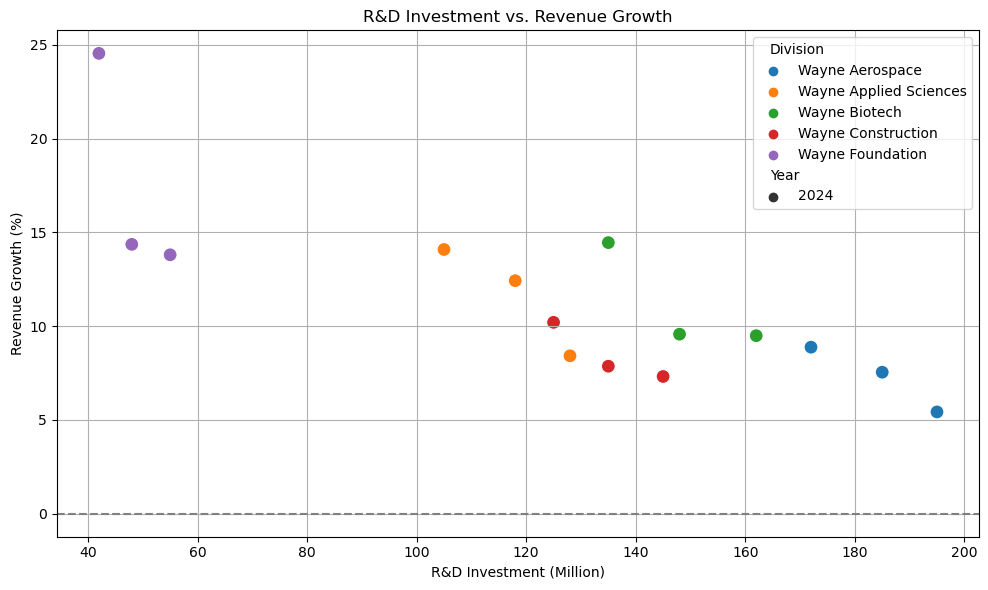

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=financial_data,
    x='RD_Investment_M',
    y='Revenue_Growth_Pct',
    hue='Division',
    style='Year',
    s=100
)
plt.title('R&D Investment vs. Revenue Growth')
plt.xlabel('R&D Investment (Million)')
plt.ylabel('Revenue Growth (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


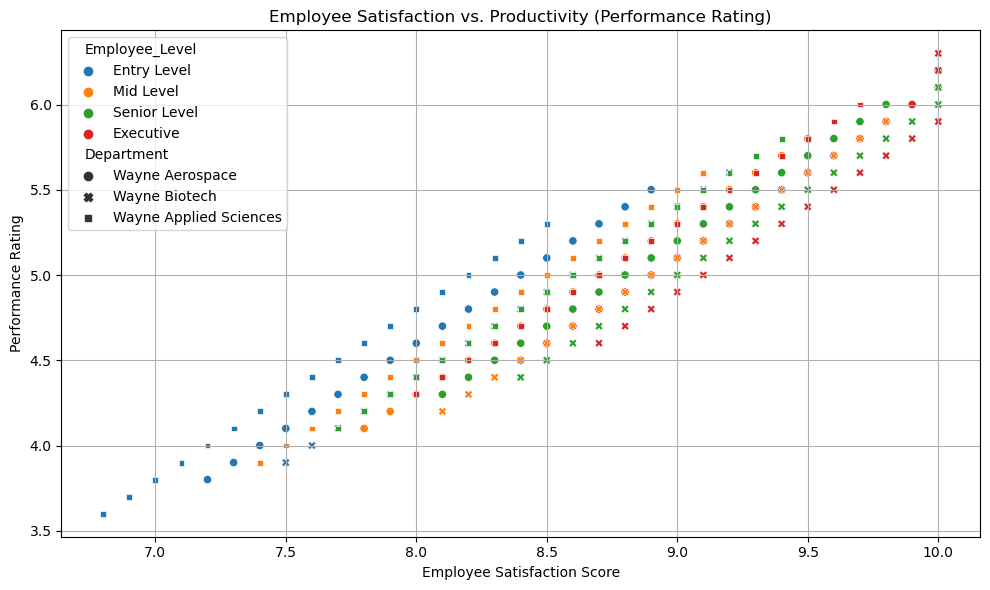

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=hr_df,  # make sure this is your DataFrame name
    x='Employee_Satisfaction_Score',
    y='Performance_Rating',
    hue='Employee_Level',
    style='Department'
)

plt.title("Employee Satisfaction vs. Productivity (Performance Rating)")
plt.xlabel("Employee Satisfaction Score")
plt.ylabel("Performance Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


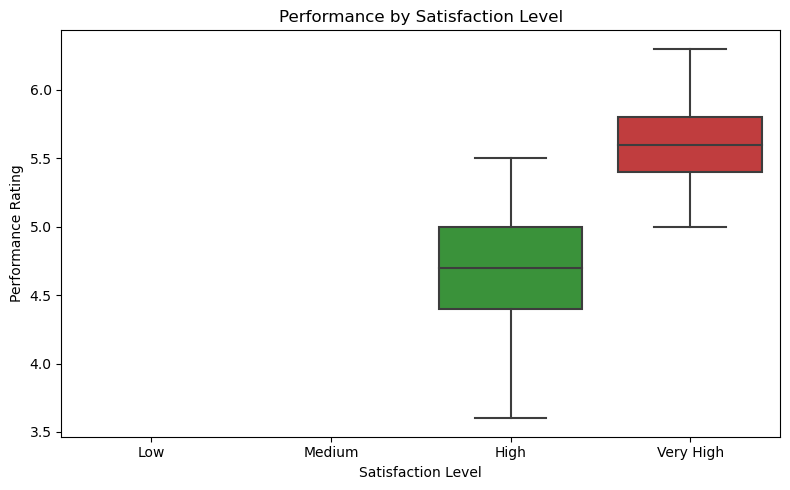

In [49]:
hr_df['Satisfaction_Level'] = pd.cut(hr_df['Employee_Satisfaction_Score'], bins=[0, 3, 6, 9, 10], labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=hr_df, x='Satisfaction_Level', y='Performance_Rating')
plt.title("Performance by Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Performance Rating")
plt.tight_layout()
plt.show()
